<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module4-Model%20Diagnostics/U2_S2_D4_Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [0]:
!pip install seaborn==0.9.0 -q

In [0]:
!pip install scipy

In [0]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import optimize
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [0]:
sns.__version__

In [0]:
#Get the data
raw = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv', index_col=0)

#Only specific features will be used in this dataframe
features =['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF', 'GrLivArea', 
        'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',  
        'GarageArea', 'OpenPorchSF',  'SalePrice']
raw = raw[features].copy()

#Auto encode the dataframe columns of type category or object.
def dummy_encode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
df = dummy_encode(raw)

df = df.astype('float64')




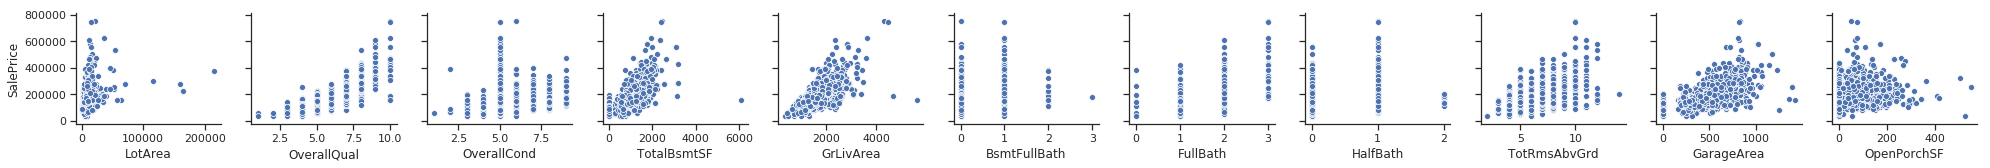

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['SalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=x_columns)

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

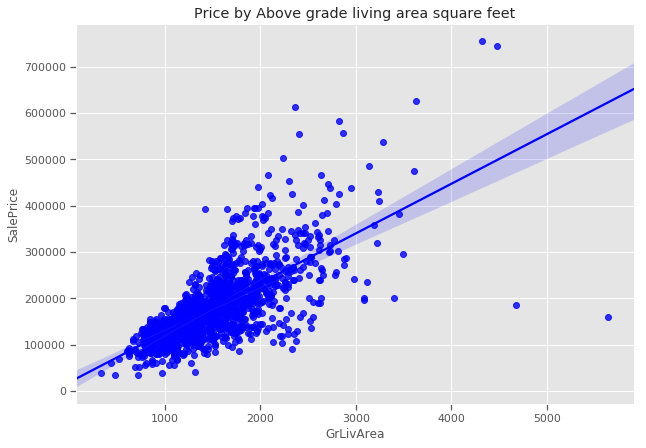

In [0]:
##### Your Code Here #####
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
fig = sns.regplot(x='GrLivArea', y = 'SalePrice', data=df,  color='blue').set_title('Price by Above grade living area square feet')


## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
##### Your Code Here #####
X = df.drop(['SalePrice'], axis=1).copy()
y = df['SalePrice']

In [0]:
# Use StatsModels to run a regression

#Add ones to X
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     452.2
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:55:03   Log-Likelihood:                -17457.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1448   BIC:                         3.500e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.278e+05   8026.067    -15.923   

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
##### Your Code Here #####


The Standard Error (SE) for a coefficient estimate shows that we are  `95%` confident that the model coefficient lie within  `coef +/- 2*SE` range.  There are  enourmously big SE s for the Overall Quality, Overall Condition, Basement Full Baths, Full Baths, Half Baths,  Total Rooms above the ground features, other features have big enough SE as well. 

Total Rooms above the ground and Open Porch Square Foot features have high p-values, which shows that probably, there are a lot of outliers and  features should be investigated more. For now, those features  are not meaningful addition to the model because changes in the feature's values are not related to changes in the response variable.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
##### Your Code Here #####
#Get rid of outliers
df_o = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_o.shape

(1339, 12)

In [0]:
##### Your Code Here #####
X_o = df_o.drop(['SalePrice'], axis=1).copy()
y_o = df_o['SalePrice']

In [0]:
# Use StatsModels to run a regression

#Add ones to X
X_o = sm.add_constant(X_o)

model = sm.OLS(y_o, X_o).fit()
predictions = model.predict(X_o)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     616.7
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:56:19   Log-Likelihood:                -15533.
No. Observations:                1339   AIC:                         3.109e+04
Df Residuals:                    1327   BIC:                         3.115e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.127e+05   6516.192    -17.293   

Cutting outliers off the dataset improved p-values a lot! Now, all features, besides Total rooms above the ground,  have p-value < 0.05, which shows they are predictors that likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable. Which means the `Total rooms above the ground` feature is a candidate for removing. 

Cutting outliers off helped to decrease the SE too, but not too much. 

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
##### Your Code Here #####
#Take log of y variable for smother values and easier interpretation
df_l = df_o.copy()
df_l['ln_price'] = np.log(df_l['SalePrice'])

In [0]:
df_l = df_l.drop('SalePrice', axis=1).copy()
df_l.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,GarageArea,OpenPorchSF,ln_price
Id,,,,,,,,,,,,
1,8450.0,7.0,5.0,856.0,1710.0,1.0,2.0,1.0,8.0,548.0,61.0,12.247694
2,9600.0,6.0,8.0,1262.0,1262.0,0.0,2.0,0.0,6.0,460.0,0.0,12.109011
3,11250.0,7.0,5.0,920.0,1786.0,1.0,2.0,1.0,6.0,608.0,42.0,12.317167
4,9550.0,7.0,5.0,756.0,1717.0,1.0,1.0,0.0,7.0,642.0,35.0,11.849398
5,14260.0,8.0,5.0,1145.0,2198.0,1.0,2.0,1.0,9.0,836.0,84.0,12.429216


In [0]:
X_l = df_l.drop('ln_price', axis=1).copy()
y_l = df_l['ln_price']

# Use StatsModels to run a regression

#Add ones to X
X_l = sm.add_constant(X_l)

model = sm.OLS(y_l, X_l).fit()
predictions = model.predict(X_l)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     706.2
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:41:52   Log-Likelihood:                 728.65
No. Observations:                1339   AIC:                            -1433.
Df Residuals:                    1327   BIC:                            -1371.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.2619      0.035    296.195   

Taking log of `y` variable helped to decrease the the SE a lot!

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
##### Your Code Here #####
#Variance Inflation Factor or VIF
print(X_l.columns)

vif = [variance_inflation_factor(X_l.values, i) for i in range(X_l.shape[1])]
print(vif)


Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'GarageArea', 'OpenPorchSF'],
      dtype='object')
[80.78112571877557, 1.2464856553621668, 2.287893665536844, 1.0997439530671835, 1.8377529475303278, 4.929578860454475, 1.1325781597634534, 2.093330061786871, 1.5257642388274604, 3.175603529430299, 1.6619922453037088, 1.210714186729911]


There are no values grater than ten. I believe `GrLivArea` has a great impact on the price, despite it's `vif` value is the highest, yet no too high

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
##### Your Code Here #####
df_l.corr()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,GarageArea,OpenPorchSF,ln_price
LotArea,1.000000,0.140068,-0.032180,0.274660,0.345274,0.062598,0.172667,0.044888,0.329266,0.263078,0.101314,0.351129
OverallQual,0.140068,1.000000,-0.161833,0.512573,0.579102,0.106081,0.560596,0.272285,0.395465,0.547714,0.343028,0.810452
OverallCond,-0.032180,-0.161833,1.000000,-0.173727,-0.133056,-0.020705,-0.257990,-0.065146,-0.087050,-0.177344,-0.092641,-0.087668
TotalBsmtSF,0.274660,0.512573,-0.173727,1.000000,0.345782,0.267012,0.307393,-0.118795,0.207987,0.460608,0.216150,0.613452
GrLivArea,0.345274,0.579102,-0.133056,0.345782,1.000000,-0.009156,0.630193,0.439306,0.815024,0.455805,0.338220,0.706006
BsmtFullBath,0.062598,0.106081,-0.020705,0.267012,-0.009156,1.000000,-0.067061,-0.064906,-0.084992,0.162516,0.054692,0.224730
FullBath,0.172667,0.560596,-0.257990,0.307393,0.630193,-0.067061,1.000000,0.168327,0.522730,0.433569,0.314054,0.606147
HalfBath,0.044888,0.272285,-0.065146,-0.118795,0.439306,-0.064906,0.168327,1.000000,0.336550,0.155162,0.229302,0.318858
TotRmsAbvGrd,0.329266,0.395465,-0.087050,0.207987,0.815024,-0.084992,0.522730,0.336550,1.000000,0.313165,0.231660,0.504704
GarageArea,0.263078,0.547714,-0.177344,0.460608,0.455805,0.162516,0.433569,0.155162,0.313165,1.000000,0.272382,0.660441


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

The correlation matrix above revealed a high correlation between `TotRmsAbvGrd` and `GrLivArea`

In [0]:
##### Your Code Here #####
# remove the collinear to GrLivArea feature TotRmsAbvGrd
d = df_l.drop('TotRmsAbvGrd', axis=1)
d

In [0]:
X_i = d.drop( 'ln_price', axis=1).copy()
y_i = d['ln_price']

# Use StatsModels to run a regression

#Add ones to X
X_i = sm.add_constant(X_i)

model = sm.OLS(y_i, X_i).fit()
predictions = model.predict(X_i)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     774.6
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:42:22   Log-Likelihood:                 726.60
No. Observations:                1339   AIC:                            -1431.
Df Residuals:                    1328   BIC:                            -1374.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.2366      0.032    316.588   

After removing the collinear feature, the SE of `GrLivArea` improved from `1.92e-05` to `1.4e-05` 

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
##### Your Code Here #####
# cov_type='HC3' parameter to .fit() function

model = sm.OLS(y_i, X_i).fit(cov_type='HC3')
predictions = model.predict(X_i)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     661.5
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:42:29   Log-Likelihood:                 726.60
No. Observations:                1339   AIC:                            -1431.
Df Residuals:                    1328   BIC:                            -1374.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.2366      0.044    232.576   

After running the regression using Robust Standard Errors, the standard errors slightly increased. 

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

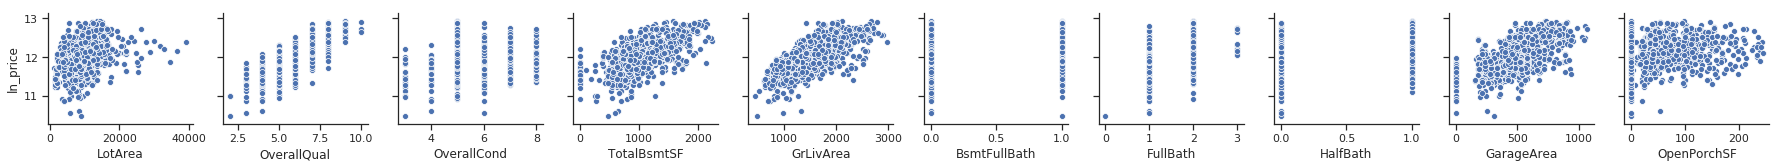

In [0]:
##### Your Code Here #####
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = d.columns.drop(['ln_price'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=d, y_vars=['ln_price'], x_vars=x_columns)

Looking at the plot above, it seems that `GrLivArea` and `TotalBsmtSf` are good candidates for polynomial regressors

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [0]:
##### Your Code Here #####
d.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'GarageArea', 'OpenPorchSF',
       'ln_price'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


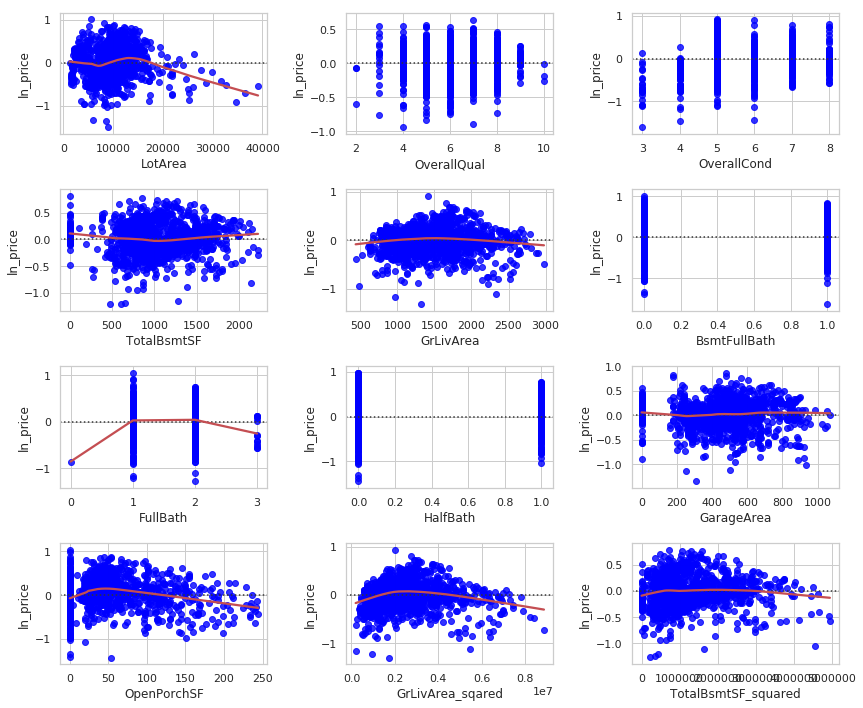

In [97]:
X = d.drop('ln_price', axis=1)
y = d['ln_price']

# There are 12 columns in X
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(12,10));

# Positions in the array of axes that I just made
position_list = []
for i in range(4):
    for j in range(3):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
##### Your Code Here #####
#Looking at the plot above, it seems the best to have polynomial out of GrLivArea and TotalBsmtSf
d['GrLivArea_sqared'] = d['GrLivArea']**2
d['TotalBsmtSF_squared'] = d['TotalBsmtSF']**2

In [0]:
d.head()

In [0]:
X_p = d.drop( 'ln_price', axis=1).copy()
y_p = d['ln_price']

# Use StatsModels to run a regression

#Add ones to X
X_p = sm.add_constant(X_p)

model = sm.OLS(y_p, X_p).fit(cov_type='HC3')
predictions = model.predict(X_p)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     554.2
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:57:32   Log-Likelihood:                 728.60
No. Observations:                1339   AIC:                            -1431.
Df Residuals:                    1326   BIC:                            -1364.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.1613    

Coefficients Standard Error is low, but p-values for squared features are, which makes them unreliable for inference

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other Diagnostic tests. Can you show that residuals are normally distributed graphically?
- Study for the sprint challenge!
- Write a blog post about iferential modeling using linear regression.